<a href="https://colab.research.google.com/github/valixonov04/AI_knowledge/blob/main/deeplearnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sun'iy Neyron Tarmoq yordamida mushuklarni taniy oladigon model qurish.

Dataset: Oxford-IIIT  pet dataset

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [ ]:
#kutubhonalar
from fastai.vision.all import *
from ipywidgets import widgets

#data
path = untar_data(URLs.PETS)/'images'

#label
def is_dog(x): return x[0].islower()

# dataloders
dls = ImageDataLoaders.from_name_func(
    path,get_image_files(path), valid=0.2, seed=42,
    label_func = is_dog, item_tfms=Resize(224)
)

#train

learn = cnn_learner(dls, resnet34, metrics =accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

##Modelni sinab ko'rish

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlik ehtimoligi: 1.000


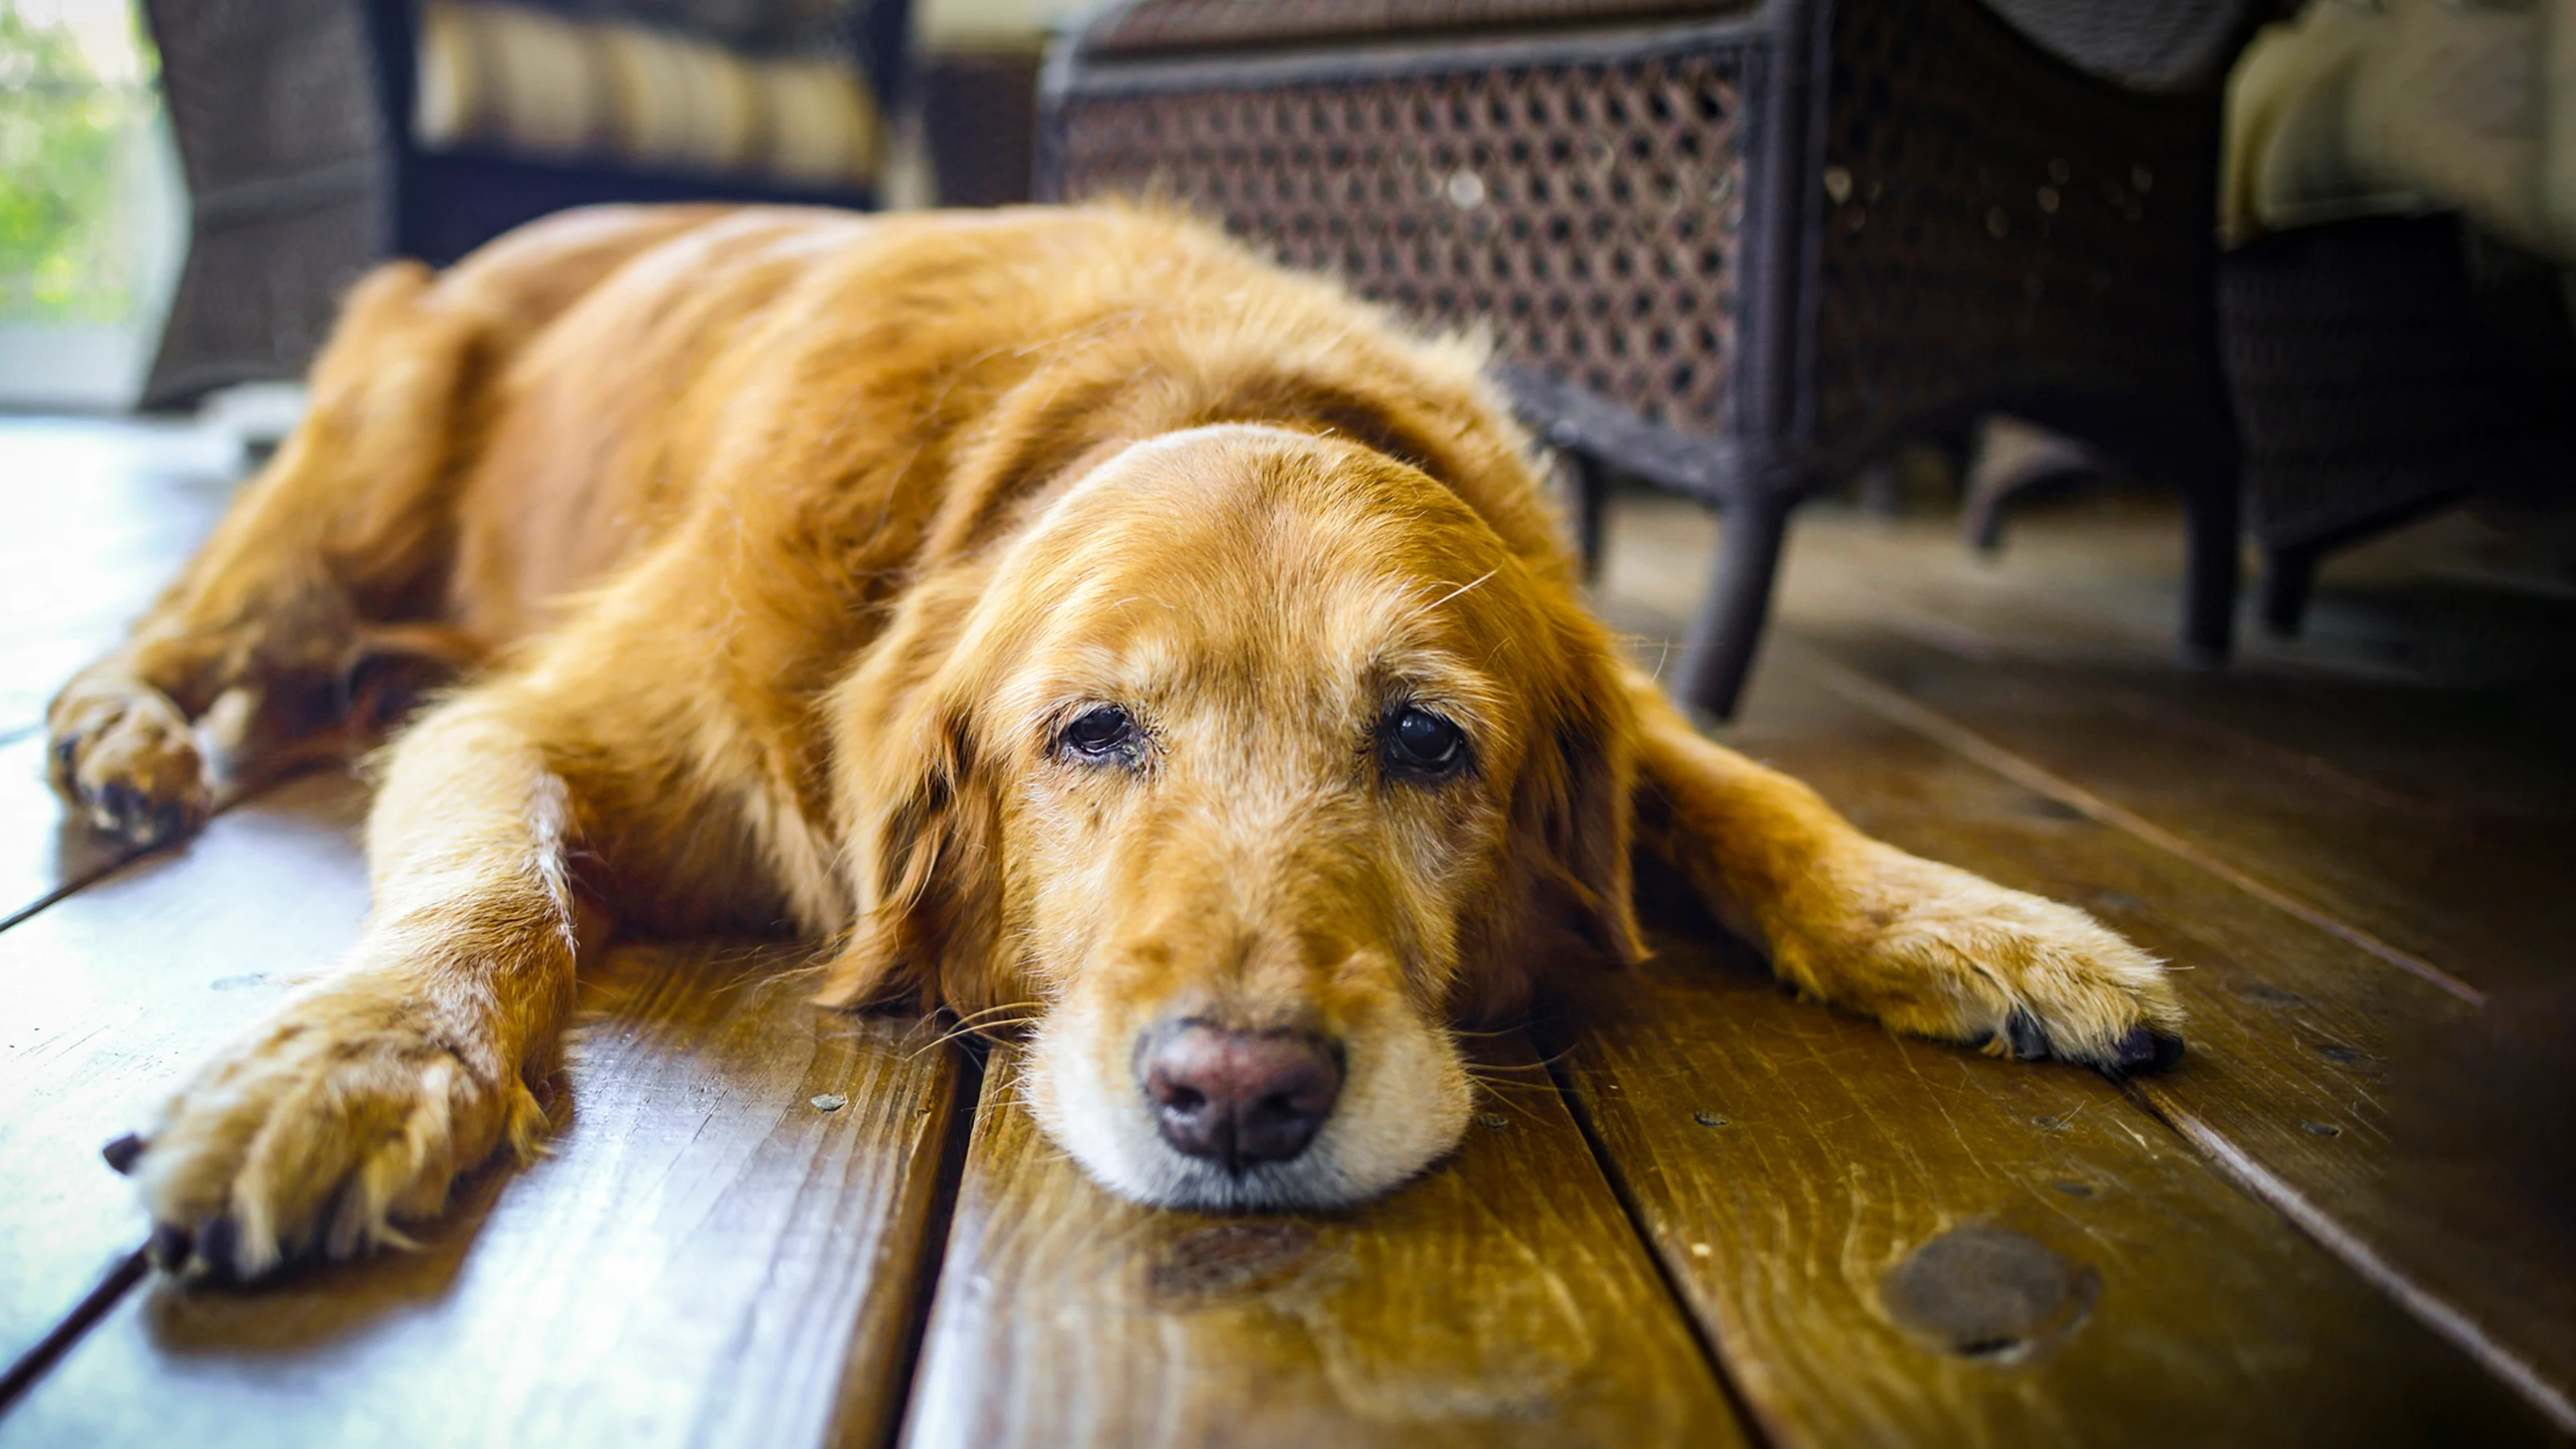

In [ ]:
img = PILImage.create(upload.data[-1])
pred,_,prob = learn.predict(img)
print(f'Mushukmi?: {pred}')
print(f"Aniqlik ehtimoligi: {prob[1].item():.3f}")
img